# Linear Regression

![](banner_lr.jpg)

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
update_geom_defaults("segment", list(colour=NEW_COLOR))
update_geom_defaults("line", list(color="black", size=0.15))
rbind.dup = function(data, n) { data.dup = data.frame(); for (i in 1:n) data.dup = rbind(data.dup, data); data.dup }

.................................................... start of document ....................................................

## Introduction

Linear regression is a method to construct models to predict numeric values.  Various versions of linear regression all use optimization techniques to find the best fit line (or plane or hyper-plane) through a set of observations.

## Terms

* **response, dependent, outcome:** the variable to be predicted
* **explanatory, independent, predictor:** the variables used to make the prediction

## Simple Linear Regression

Construct a model to predict the numeric value of an outcome variable given one predictor variable.

### Data

Consider this dataset and new observation.

data 
 
 
 x1 
 outcome 
 
 
 
 
 1.0 
 1.0 
 
 
 2.0 
 0.5 
 
 
 3.0 
 3.0 
 
 
 4.0 
 3.0 
 
 
 6.0 
 4.0 
 
 
 6.5 
 5.5 
 
 
 7.0 
 7.0 
 
 
 9.0 
 6.0 
 
 
 
 new 
 
 
 x1 
 
 
 
 
 5

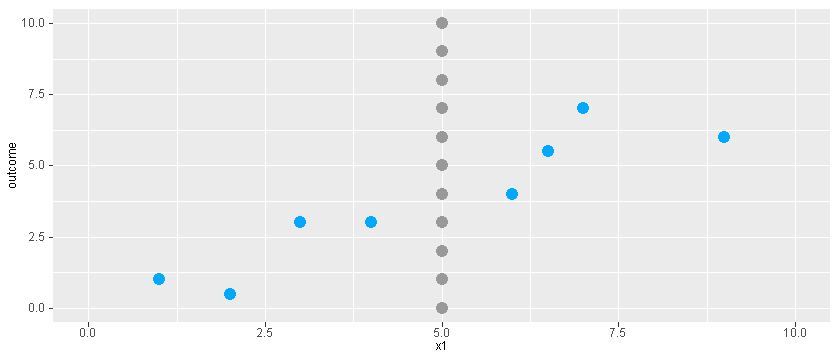

In [2]:
data = data.frame(x1=c(1.0, 2.0, 3.0, 4.0, 6.0, 6.5, 7.0, 9.0), outcome=c( 1.0, 0.5, 3.0, 3.0, 4.0, 5.5, 7.0, 6.0))
new = data.frame(x1=5.0)

layout(fmt(data), fmt(new))

ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_point(aes(x=x1, y=outcome)) +
geom_point(aes(x=x1, y=0:10), data=rbind.dup(new,11), color=NEW_COLOR)

### Model: Best Fit Line

,coefficient
(Intercept),-0.0091445
x1,0.7811209


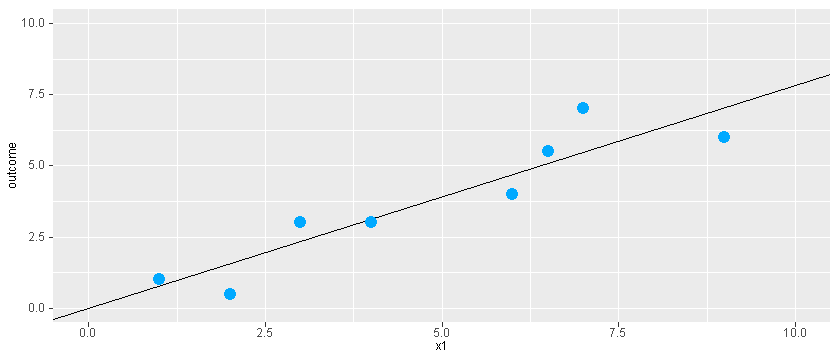

In [3]:
model = lm(outcome~x1, data)

fmt(data.frame(coefficient=model$coefficients), "model", row.names=TRUE)

ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_abline(aes(intercept=model$coefficients["(Intercept)"], slope=model$coefficients["x1"])) + 
geom_point(aes(x=x1, y=outcome))

### Criterion for Best Fit Line

The best fit line is determined using the ordinary least squares (OLS) optimization method.  Minimize the sum of the squares of the differences between the line and the actual values.

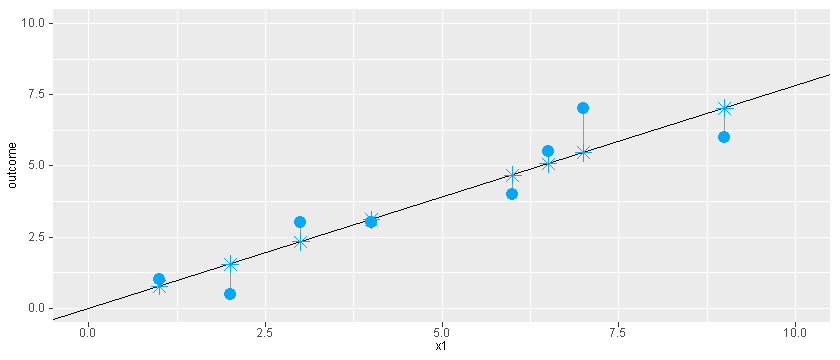

In [4]:
ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_abline(aes(intercept=model$coefficients["(Intercept)"], slope=model$coefficients["x1"])) + 
geom_segment(aes(x=x1, y=outcome, xend=x1, yend=predict(model, data))) +
geom_point(aes(x=x1, y=outcome)) +
geom_point(aes(x=x1, y=predict(model, data)), shape=8)

In [5]:
data$outcome.predicted = predict(model, data)
data$error = data$outcome - data$outcome.predicted
data$square_error = data$error^2
fmt(data)

data.frame(sum_error=sum(data$error), sum_square_error=sum(data$square_error))

x1,outcome,outcome.predicted,error,square_error
1.0,1.0,0.7719764,0.2280236,0.0519948
2.0,0.5,1.5530973,-1.0530973,1.1090140
3.0,3.0,2.3342183,0.6657817,0.4432653
4.0,3.0,3.1153392,-0.1153392,0.0133031
6.0,4.0,4.6775811,-0.6775811,0.4591162
6.5,5.5,5.0681416,0.4318584,0.1865017
7.0,7.0,5.4587021,1.5412979,2.3755993
9.0,6.0,7.0209440,-1.0209440,1.0423266


sum_error,sum_square_error
0.00000000000001210143,5.681121


There are many lines that minimize differences.  There are many lines that minimize absolute differences.  There is **exactly one** line that minimizes square of differences.

For example, consider this simple case.

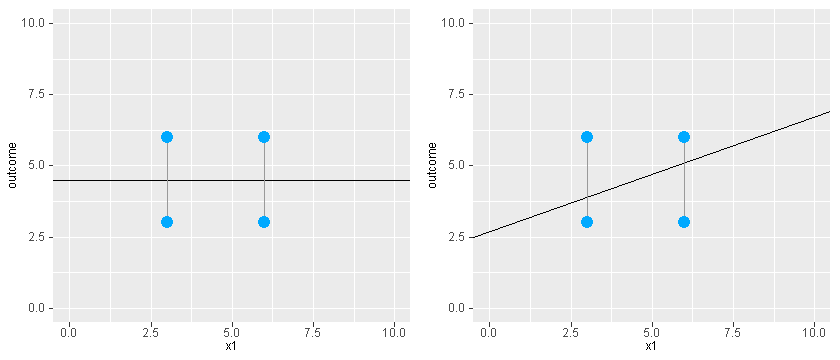

In [6]:
data.simple_case = data.frame(x1=c(3,3,6,6), outcome=c(6,3,6,3))
model.simple_case = lm(outcome~x1, data.simple_case)
model.simple_case_2 = lm(outcome~x1, data.frame(outcome=c(4.5,4.7), x1=c(4.5,5)))

p1 = ggplot(data.simple_case) + xlim(0,10) + ylim(0,10) + 
     geom_abline(aes(intercept=model.simple_case$coefficients["(Intercept)"], slope=model.simple_case$coefficients["x1"])) +
     geom_segment(aes(x=x1, y=outcome, xend=x1, yend=predict(model.simple_case, data.simple_case))) +
     geom_point(aes(x=x1, y=outcome))

p2 = ggplot(data.simple_case) + xlim(0,10) + ylim(0,10) + 
     geom_abline(aes(intercept=model.simple_case_2$coefficients["(Intercept)"], slope=model.simple_case_2$coefficients["x1"])) +
     geom_segment(aes(x=x1, y=outcome, xend=x1, yend=predict(model.simple_case_2, data.simple_case))) +
     geom_point(aes(x=x1, y=outcome))

grid.arrange(p1, p2, nrow=1)

In [8]:
outcome.predicted = predict(model.simple_case, data.simple_case)
error = data.simple_case$outcome - outcome.predicted
abs_error = abs(error)
square_error = error^2
d1 = data.frame(data.simple_case, outcome.predicted, error, abs_error, square_error)
s1 = data.frame(sum_error=sum(error), sum_abs_error=sum(abs_error), sum_square_error=sum(square_error))

outcome.predicted = predict(model.simple_case_2, data.simple_case)
error = data.simple_case$outcome - outcome.predicted
abs_error = abs(error)
square_error = error^2
d2 = data.frame(data.simple_case, outcome.predicted, error, abs_error, square_error)
s2 = data.frame(sum_error=sum(error), sum_abs_error=sum(abs_error), sum_square_error=sum(square_error))

layout(d1, d2, s1, s2, nrow=2)

x1 
 outcome 
 outcome.predicted 
 error 
 abs_error 
 square_error 
 
 
 
 
 3 
 6 
 4.5 
 1.5 
 1.5 
 2.25 
 
 
 3 
 3 
 4.5 
 -1.5 
 1.5 
 2.25 
 
 
 6 
 6 
 4.5 
 1.5 
 1.5 
 2.25 
 
 
 6 
 3 
 4.5 
 -1.5 
 1.5 
 2.25 
 
 
 
 
 
 x1 
 outcome 
 outcome.predicted 
 error 
 abs_error 
 square_error 
 
 
 
 
 3 
 6 
 3.9 
 2.1 
 2.1 
 4.41 
 
 
 3 
 3 
 3.9 
 -0.9 
 0.9 
 0.81 
 
 
 6 
 6 
 5.1 
 0.9 
 0.9 
 0.81 
 
 
 6 
 3 
 5.1 
 -2.1 
 2.1 
 4.41 
 
 
 
 
 
 sum_error 
 sum_abs_error 
 sum_square_error 
 
 
 
 
 0 
 6 
 9 
 
 
 
 
 
 sum_error 
 sum_abs_error 
 sum_square_error 
 
 
 
 
 0 
 6 
 10.44

### Prediction

x1,outcome.predicted
5,3.89646


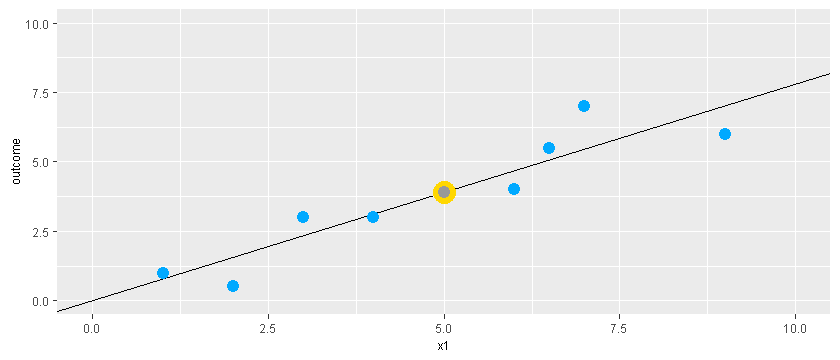

In [8]:
model = lm(outcome~x1, data)
new$outcome.predicted = predict(model, new)

fmt(new)

ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_abline(aes(intercept=model$coefficients["(Intercept)"], slope=model$coefficients["x1"])) + 
geom_point(aes(x=x1, y=outcome)) +
geom_point(aes(x=x1, y=new$outcome.predicted), data=new, color="gold", size=6) +
geom_point(aes(x=x1, y=new$outcome.predicted), data=new, color=NEW_COLOR)

## Multiple Linear Regression

Construct a model to predict the numeric value of an outcome variable given several predictor variables.

### Data

Consider this dataset and new observation.

In [47]:
data = data.frame(x1=c(1.0, 2.0, 3.0, 4.0, 6.0, 6.5, 7.0, 9.0), x2=c(5.0, 7.0, 2.0, 4.0, 3.0, 1.0, 2.0, 2.5), outcome=c( 1.0, 0.5, 3.0, 3.0, 4.0, 5.5, 7.0, 6.0))
new = data.frame(x1=5.0, x2=5.0)

layout(fmt(data), fmt(new))

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data, type="s", col=PALETTE[1], xlim=c(0,10), ylim=c(0,10), zlim=c(0,10))
spheres3d(data.frame(x1=new$x1, x2=new$x2, outcome=0:10), radius=0.35, color=NEW_COLOR, add=TRUE)
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=400, height=400, reuse=FALSE)

data 
 
 
 x1 
 x2 
 outcome 
 
 
 
 
 1.0 
 5.0 
 1.0 
 
 
 2.0 
 7.0 
 0.5 
 
 
 3.0 
 2.0 
 3.0 
 
 
 4.0 
 4.0 
 3.0 
 
 
 6.0 
 3.0 
 4.0 
 
 
 6.5 
 1.0 
 5.5 
 
 
 7.0 
 2.0 
 7.0 
 
 
 9.0 
 2.5 
 6.0 
 
 
 
 new 
 
 
 x1 
 x2 
 
 
 
 
 5 
 5

HTML widgets cannot be represented in plain text (need html)

### Model

In [10]:
model = lm(outcome~x1+x2, data)

fmt(data.frame(coefficient=model$coefficients), "model", row.names=TRUE)

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data, type="s", col=PALETTE[1], xlim=c(0,10), ylim=c(0,10), zlim=c(0,10))
planes3d(a=model$coefficients["x1"], b=model$coefficients["x2"], c=-1, d=model$coefficients["(Intercept)"], color=NEW_COLOR, alpha=0.3, add=TRUE)
spheres3d(data.frame(x1=new$x1, x2=new$x2, outcome=0:10), radius=0.35, color=NEW_COLOR, add=TRUE)
grid3d(c("x","y","z"))
rglwidget(elementId="myplot2", width=400, height=400, reuse=FALSE)

,coefficient
(Intercept),2.5487336
x1,0.5622149
x2,-0.4541563


HTML widgets cannot be represented in plain text (need html)

### Prediction

In [11]:
new$outcome.predicted = predict(model, new)
fmt(new)

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(rbind(data, data.frame(x1=new$x1, x2=new$x2, outcome=new$outcome.predicted)), type="s", col=c(rep(PALETTE[1],nrow(data)),NEW_COLOR), xlim=c(0,10), ylim=c(0,10), zlim=c(0,10))
planes3d(a=model$coefficients["x1"], b=model$coefficients["x2"], c=-1, d=model$coefficients["(Intercept)"], color=NEW_COLOR, alpha=0.3, add=TRUE)
segments3d(data.frame(x1=new$x1, x2=new$x2, outcome=c(0,new$outcome.predicted)), color=NEW_COLOR, lw=5)
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=400, height=400, reuse=FALSE)

x1,x2,outcome.predicted
5,5,3.089027


HTML widgets cannot be represented in plain text (need html)

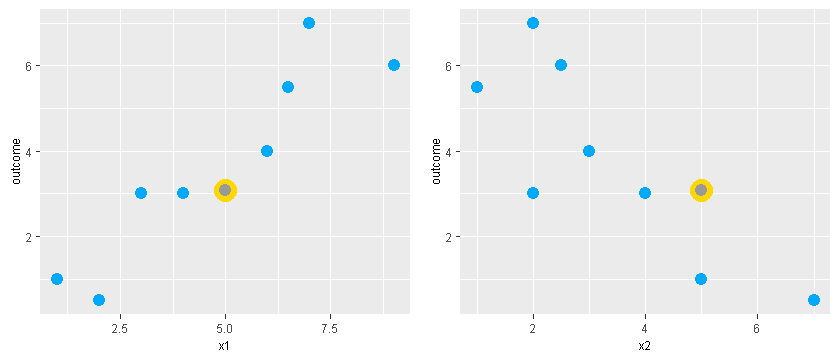

In [12]:
grid.arrange(ggplot(data) +
             geom_point(aes(x=x1, y=outcome)) +
             geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
             geom_point(aes(x=x1, y=outcome.predicted), data=new, color=NEW_COLOR),

             ggplot(data) +
             geom_point(aes(x=x2, y=outcome)) +
             geom_point(aes(x=x2, y=new$outcome.predicted), data=new, color="gold", size=6) +
             geom_point(aes(x=x2, y=new$outcome.predicted), data=new, color=NEW_COLOR),
             
             nrow=1)

## Linear Regression with Log Outcome Transformation

Construct a model to predict the numeric value of the log of an outcome variable given predictor variable(s).  This may be useful if the variables are not well linearly correlated. 

### Data

Consider this dataset and new observation.

data 
 
 
 x1 
 outcome 
 
 
 
 
 1.0 
 7.0 
 
 
 2.0 
 6.5 
 
 
 3.0 
 6.0 
 
 
 4.0 
 2.0 
 
 
 6.0 
 2.0 
 
 
 6.5 
 1.0 
 
 
 7.0 
 1.0 
 
 
 9.0 
 1.5 
 
 
 
 new 
 
 
 x1 
 
 
 
 
 5

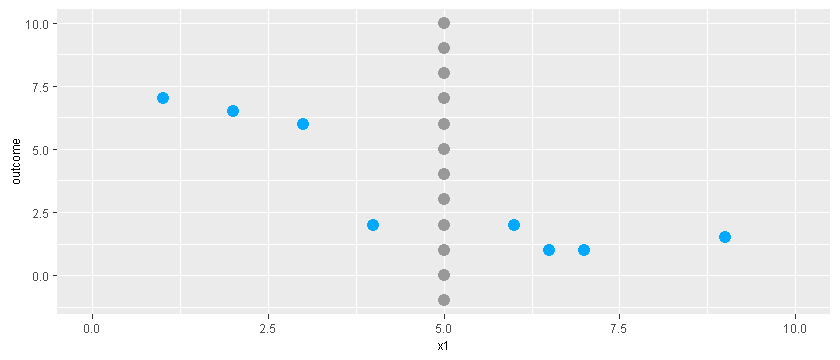

In [13]:
data = data.frame(x1=c( 1.0, 2.0, 3.0, 4.0, 6.0, 6.5, 7.0, 9.0), outcome=c( 7.0, 6.5, 6.0, 2.0, 2.0, 1.0, 1.0, 1.5))
new = data.frame(x1=5.0)

layout(fmt(data), fmt(new))

ggplot(data) + xlim(0,10) + ylim(-1,10) +
geom_point(aes(x=x1, y=outcome)) +
geom_point(aes(x=x1, -1:10), data=rbind.dup(new,12), color=NEW_COLOR)

### Model & Prediction without Transformation

,coefficient
(Intercept),7.4578171
x1,-0.8483776
x1,outcome.predicted
5,3.215929


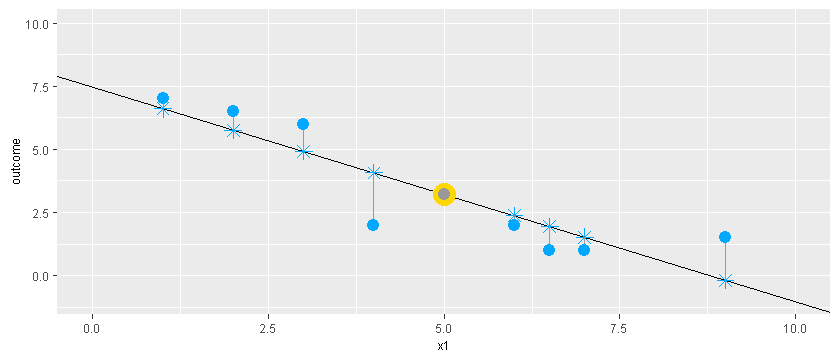

In [14]:
model = lm(outcome~x1, data)
new$outcome.predicted = predict(model, new)

layout(fmt(data.frame(coefficient=model$coefficients), "model", TRUE), fmt(new))

ggplot(data) + xlim(0,10) + ylim(-1,10) +
geom_abline(aes(intercept=model$coefficients["(Intercept)"], slope=model$coefficients["x1"])) + 
geom_point(aes(x=x1, y=predict(model, data)), shape=8) +
geom_segment(aes(x=x1, y=outcome, xend=x1, yend=predict(model, data))) +
geom_point(aes(x=x1, y=outcome)) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color=NEW_COLOR) +
ylab("outcome")

### Transformation

In [15]:
data$log_outcome = log(data$outcome)
data = data[,c("x1","log_outcome","outcome")]
new$outcome.predicted = NULL

layout(fmt(data), fmt(new))

data 
 
 
 x1 
 log_outcome 
 outcome 
 
 
 
 
 1.0 
 1.9459101 
 7.0 
 
 
 2.0 
 1.8718022 
 6.5 
 
 
 3.0 
 1.7917595 
 6.0 
 
 
 4.0 
 0.6931472 
 2.0 
 
 
 6.0 
 0.6931472 
 2.0 
 
 
 6.5 
 0.0000000 
 1.0 
 
 
 7.0 
 0.0000000 
 1.0 
 
 
 9.0 
 0.4054651 
 1.5 
 
 
 
 new 
 
 
 x1 
 
 
 
 
 5

### Model & Prediction with Transformation

,coefficient
(Intercept),2.1946749
x1,-0.2637966
x1,log_outcome.predicted
5,0.8756921


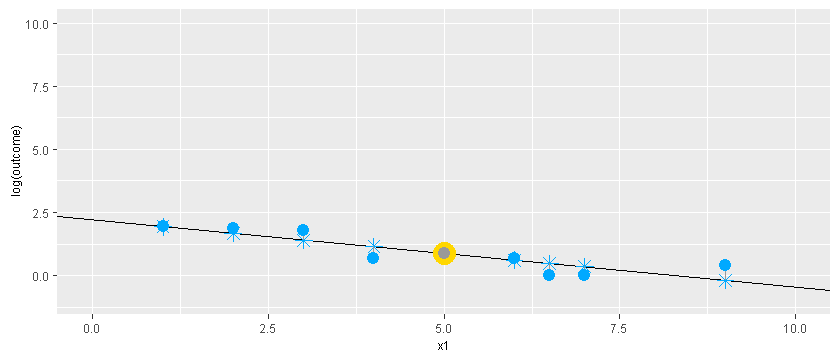

In [16]:
model = lm(log_outcome~x1, data)
new$log_outcome.predicted = predict(model, new)

layout(fmt(data.frame(coefficient=model$coefficients), "model", TRUE), fmt(new))

ggplot(data) + xlim(0,10) + ylim(-1,10) +
geom_abline(aes(intercept=model$coefficients["(Intercept)"], slope=model$coefficients["x1"])) + 
geom_point(aes(x=x1, y=predict(model, data)), shape=8) +
geom_segment(aes(x=x1, y=log_outcome, xend=x1, yend=predict(model, data))) +
geom_point(aes(x=x1, y=log_outcome)) +
geom_point(aes(x=x1, y=log_outcome.predicted), data=new, color="gold", size=6) +
geom_point(aes(x=x1, y=log_outcome.predicted), data=new, color=NEW_COLOR) +
ylab("log(outcome)")

### Prediction

Unwind the transformation. 

x1,log_outcome.predicted,outcome.predicted
5,0.8756921,2.400536


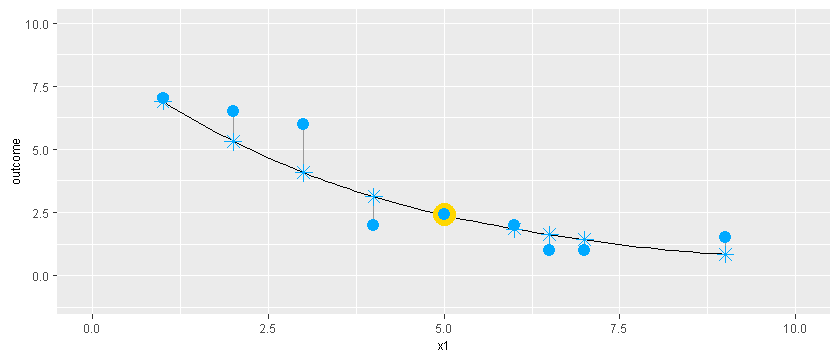

In [17]:
new$outcome.predicted = exp(predict(model, new))

fmt(new)

ggplot(data) + xlim(0,10) + ylim(-1,10) +
geom_smooth(aes(x=x1, y=exp(predict(model, data))), method="loess", se=FALSE) +
geom_segment(aes(x=x1, y=outcome, xend=x1, yend=exp(predict(model, data)))) +
geom_point(aes(x=x1, y=exp(predict(model, data))), shape=8) +
geom_point(aes(x=x1, y=outcome)) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
geom_point(aes(x=x1, y=outcome.predicted), data=new) +
ylab("outcome")

## Linear Regression with Log Predictor Transformation

Construct a model to predict the numeric value of an outcome variable given the log of predictor variable(s).  This may be useful if the variables are not well linearly correlated. 

### Data

Consider this dataset and new observation.

data 
 
 
 x1 
 outcome 
 
 
 
 
 1.0 
 7.0 
 
 
 2.0 
 6.5 
 
 
 3.0 
 6.0 
 
 
 4.0 
 2.0 
 
 
 6.0 
 2.0 
 
 
 6.5 
 1.0 
 
 
 7.0 
 1.0 
 
 
 9.0 
 1.5 
 
 
 
 new 
 
 
 x1 
 
 
 
 
 5

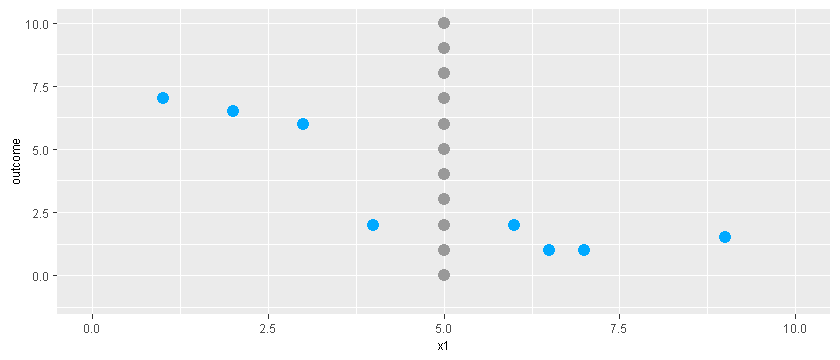

In [18]:
data = data.frame(x1=c( 1.0, 2.0, 3.0, 4.0, 6.0, 6.5, 7.0, 9.0), outcome=c( 7.0, 6.5, 6.0, 2.0, 2.0, 1.0, 1.0, 1.5))
new = data.frame(x1=5.0)

layout(fmt(data), fmt(new))

ggplot(data) + xlim(0,10) + ylim(-1,10) +
geom_point(aes(x=x1, y=outcome)) +
geom_point(aes(x=x1, 0:10), data=rbind.dup(new,11), color=NEW_COLOR)

### Model & Prediction without Transformation

,coefficient
(Intercept),7.4578171
x1,-0.8483776
x1,outcome.predicted
5,3.215929


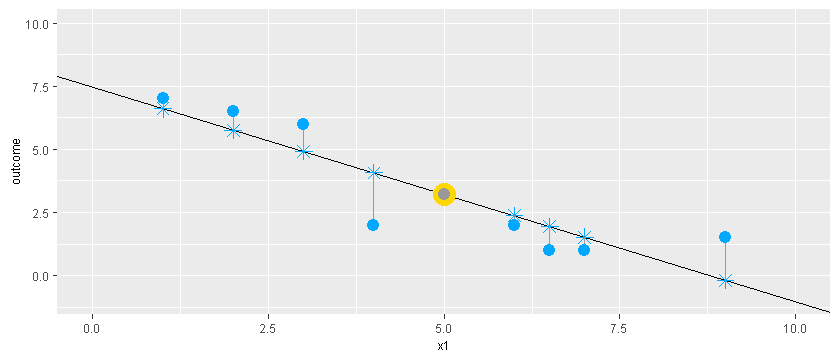

In [19]:
model = lm(outcome~x1, data)
new$outcome.predicted = predict(model, new)

layout(fmt(data.frame(coefficient=model$coefficients), "model", TRUE), fmt(new))

ggplot(data) + xlim(0,10) + ylim(-1,10) +
geom_abline(aes(intercept=model$coefficients["(Intercept)"], slope=model$coefficients["x1"])) + 
geom_point(aes(x=x1, y=predict(model, data)), shape=8) +
geom_segment(aes(x=x1, y=outcome, xend=x1, yend=predict(model, data))) +
geom_point(aes(x=x1, y=outcome)) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color=NEW_COLOR) +
ylab("outcome")

### Transformation

In [20]:
data$log_x1 = log(data$x1)
data = data[,c(1,3,2)]
new$outcome.predicted = NULL
new$log_x1 = log(new$x1)

layout(fmt(data), fmt(new))

data 
 
 
 x1 
 log_x1 
 outcome 
 
 
 
 
 1.0 
 0.0000000 
 7.0 
 
 
 2.0 
 0.6931472 
 6.5 
 
 
 3.0 
 1.0986123 
 6.0 
 
 
 4.0 
 1.3862944 
 2.0 
 
 
 6.0 
 1.7917595 
 2.0 
 
 
 6.5 
 1.8718022 
 1.0 
 
 
 7.0 
 1.9459101 
 1.0 
 
 
 9.0 
 2.1972246 
 1.5 
 
 
 
 new 
 
 
 x1 
 log_x1 
 
 
 
 
 5 
 1.609438

### Model & Prediction with Transformation

model 
 
 
 
 coefficient 
 
 
 
 
 (Intercept) 
 7.830261 
 
 
 log_x1 
 -3.244688 
 
 
 
 new 
 
 
 x1 
 log_x1 
 outcome.predicted 
 
 
 
 
 5 
 1.609438 
 2.608137

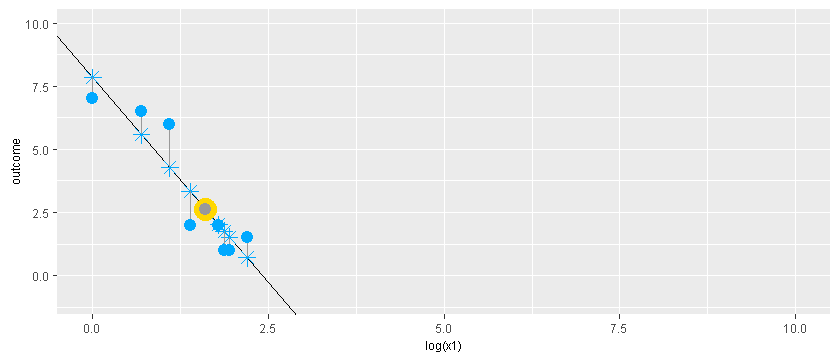

In [21]:
model = lm(outcome~log_x1, data)
new$outcome.predicted = predict(model, new)

layout(fmt(data.frame(coefficient=model$coefficients), "model", TRUE), fmt(new))

ggplot(data) + xlim(0,10) + ylim(-1,10) + 
geom_abline(aes(intercept=model$coefficients["(Intercept)"], slope=model$coefficients["log_x1"])) + 
geom_point(aes(x=log_x1, y=predict(model, data)), shape=8) +
geom_segment(aes(x=log_x1, y=outcome, xend=log_x1, yend=predict(model, data))) +
geom_point(aes(x=log_x1, y=outcome)) +
geom_point(aes(x=log_x1, y=outcome.predicted), data=new, color="gold", size=6) +
geom_point(aes(x=log_x1, y=outcome.predicted), data=new, color=NEW_COLOR) +
xlab("log(x1)") + ylab("outcome")

### Prediction

Unwind the prediction.

x1,log_x1,outcome.predicted
5,1.609438,2.608137


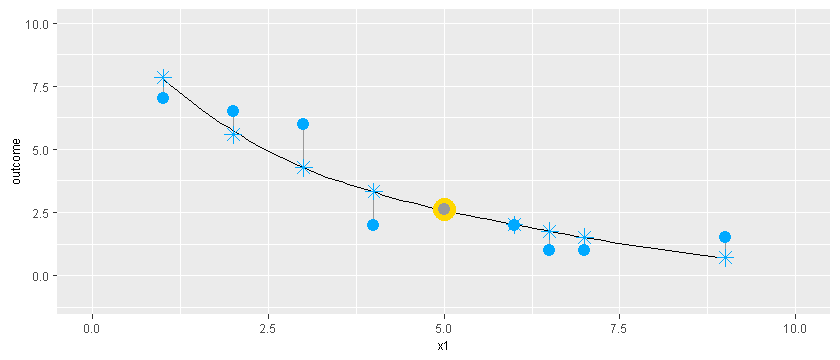

In [22]:
fmt(new)

ggplot(data) + xlim(0,10) + ylim(-1,10) +
geom_smooth(aes(x=x1, y=predict(model, data)), method="loess", se=FALSE) +
geom_segment(aes(x=x1, y=outcome, xend=x1, yend=predict(model, data))) +
geom_point(aes(x=x1, y=predict(model, data)), shape=8) +
geom_point(aes(x=x1, y=outcome)) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color=NEW_COLOR) +
ylab("outcome")

## Linear Regression with Polynomial Transformation

Construct a model to predict the numeric value of an outcome variable given predictor variables, where some of the variables are powers of other variables.  This may be useful if the variables are not well linearly correlated. 

### Data

Consider this dataset and new observation.

data 
 
 
 x1 
 outcome 
 
 
 
 
 1.0 
 8.0 
 
 
 2.0 
 6.5 
 
 
 3.0 
 6.0 
 
 
 4.0 
 2.0 
 
 
 6.0 
 1.0 
 
 
 6.5 
 3.0 
 
 
 7.0 
 5.0 
 
 
 9.0 
 9.0 
 
 
 
 new 
 
 
 x1 
 
 
 
 
 5

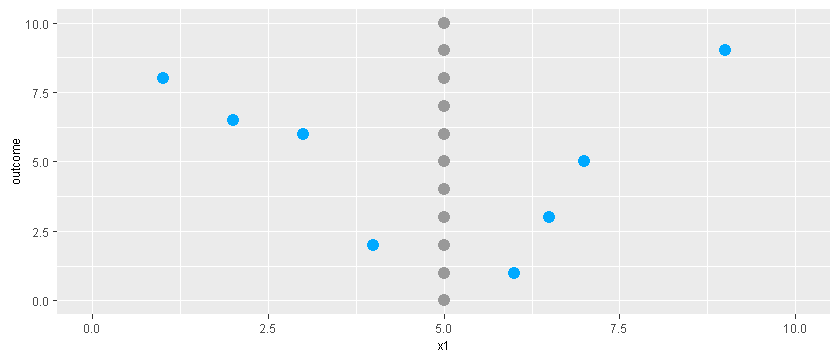

In [23]:
data = data.frame(x1=c( 1.0, 2.0, 3.0, 4.0, 6.0, 6.5, 7.0, 9.0), outcome=c( 8.0, 6.5, 6.0, 2.0, 1.0, 3.0, 5.0, 9.0))
new = data.frame(x1=5.0)

layout(fmt(data), fmt(new))

ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_point(aes(x=x1, y=outcome)) +
geom_point(aes(x=new$x1, 0:10), data=rbind.dup(new,11), color=NEW_COLOR)

### Model & Prediction without Transformation

Model: $outcome = 5.64 + -0.12x_1$

,coefficient
(Intercept),5.644543
x1,-0.120944
x1,outcome.predicted
5,5.039823


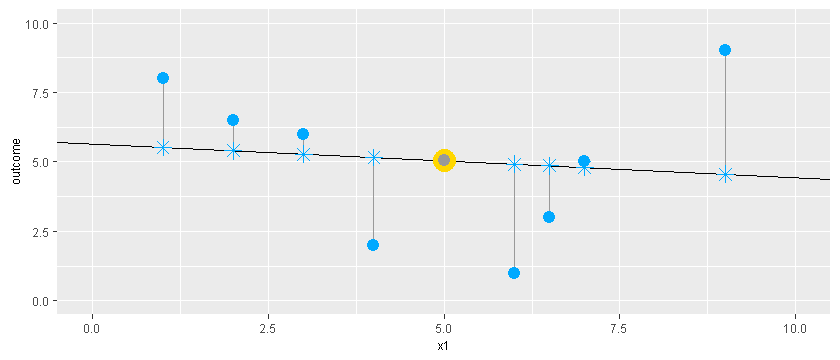

In [24]:
model = lm(outcome~x1, data)
new$outcome.predicted = predict(model, new)

layout(fmt(data.frame(coefficient=model$coefficients), "model", TRUE), fmt(new))

ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_abline(aes(intercept=model$coefficients["(Intercept)"], slope=model$coefficients["x1"])) + 
geom_segment(aes(x=x1, y=outcome, xend=x1, yend=predict(model, data))) +
geom_point(aes(x=x1, y=outcome)) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color=NEW_COLOR) +
geom_point(aes(x=x1, y=predict(model, data)), shape=8)

### Transformation

In [25]:
data$x1.square = data$x1^2
data = data[,c("x1","x1.square","outcome")]

new$x1.square = new$x1^2

new$outcome.predicted = NULL

layout(fmt(data), fmt(new))

data 
 
 
 x1 
 x1.square 
 outcome 
 
 
 
 
 1.0 
 1.00 
 8.0 
 
 
 2.0 
 4.00 
 6.5 
 
 
 3.0 
 9.00 
 6.0 
 
 
 4.0 
 16.00 
 2.0 
 
 
 6.0 
 36.00 
 1.0 
 
 
 6.5 
 42.25 
 3.0 
 
 
 7.0 
 49.00 
 5.0 
 
 
 9.0 
 81.00 
 9.0 
 
 
 
 new 
 
 
 x1 
 x1.square 
 
 
 
 
 5 
 25

### Model & Prediction with Transformation

Model: $outcome = 12.70 + 0.41{x_1}^2 + -4.14x_1$

model 
 
 
 
 coefficient 
 
 
 
 
 (Intercept) 
 12.6972506 
 
 
 x1.square 
 0.4123324 
 
 
 x1 
 -4.1380828 
 
 
 
 new 
 
 
 x1 
 x1.square 
 outcome.predicted 
 
 
 
 
 5 
 25 
 2.315145

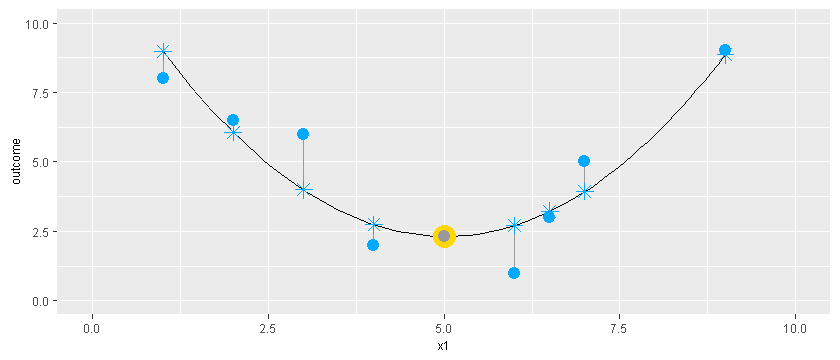

In [26]:
model = lm(outcome~x1.square+x1, data)
new$outcome.predicted = predict(model, new)

layout(fmt(data.frame(coefficient=model$coefficients), "model", TRUE), fmt(new))

ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_smooth(aes(x=x1, y=predict(model, data)), method="loess", se=FALSE) +
geom_segment(aes(x=x1, y=outcome, xend=x1, yend=predict(model, data))) +
geom_point(aes(x=x1, y=predict(model, data)), shape=8) +
geom_point(aes(x=x1, y=outcome)) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color=NEW_COLOR) +
ylab("outcome")

### Easy R Syntax for Linear Regression with Polynomial Transformation

Model: $outcome = 12.70 + 0.41{x_1}^2 + -4.14x_1$

,coefficient
(Intercept),12.6972506
"poly(x1, 2, raw = TRUE)1",-4.1380828
"poly(x1, 2, raw = TRUE)2",0.4123324
x1,outcome.predicted
5,2.315145


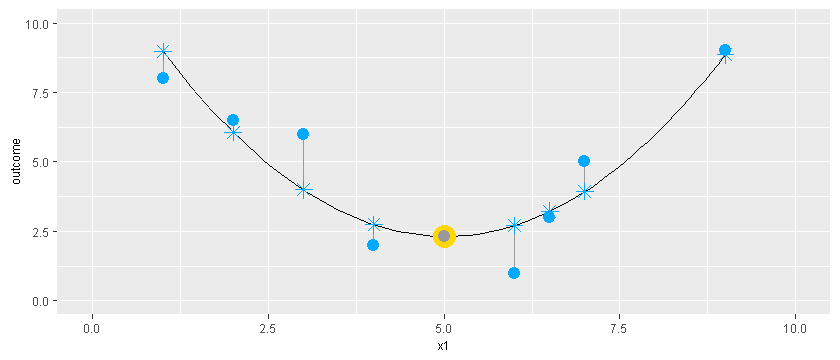

In [27]:
model = lm(outcome~poly(x1,2,raw=TRUE), data)
new$x1.square = NULL
new$outcome.predicted = predict(model, new)

layout(fmt(data.frame(coefficient=model$coefficients), "model", TRUE), fmt(new))

ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_smooth(aes(x=x1, y=predict(model, data)), method="loess", se=FALSE) +
geom_segment(aes(x=x1, y=outcome, xend=x1, yend=predict(model, data))) +
geom_point(aes(x=x1, y=predict(model, data)), shape=8) +
geom_point(aes(x=x1, y=outcome)) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color=NEW_COLOR) +
ylab("outcome")

## Linear Regression with Interaction Variables

Construct a model to predict the numeric value of an outcome variable given predictor variables and interaction variables.  This may be useful if the variables are highly interactive. 

### Data

Consider this dataset and new observation.

In [28]:
data = data.frame(x1=c(1.0, 2.0, 3.0, 4.0, 6.0, 6.5, 7.0, 9.0), x2=c(5.0, 7.0, 2.0, 4.0, 3.0, 1.0, 2.0, 2.5), outcome=c( 1.0, 0.5, 3.0, 3.0, 4.0, 5.5, 7.0, 6.0))
new = data.frame(x1=5.0, x2=5.0)

layout(fmt(data), fmt(new))

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data, type="s", col=PALETTE[1], xlim=c(0,10), ylim=c(0,10), zlim=c(0,10))
spheres3d(data.frame(x1=new$x1, x2=new$x2, outcome=0:10), radius=0.35, color=NEW_COLOR, add=TRUE)
grid3d(c("x","y","z"))
rglwidget(elementId="myplot3", width=400, height=400, reuse=FALSE)

data 
 
 
 x1 
 x2 
 outcome 
 
 
 
 
 1.0 
 5.0 
 1.0 
 
 
 2.0 
 7.0 
 0.5 
 
 
 3.0 
 2.0 
 3.0 
 
 
 4.0 
 4.0 
 3.0 
 
 
 6.0 
 3.0 
 4.0 
 
 
 6.5 
 1.0 
 5.5 
 
 
 7.0 
 2.0 
 7.0 
 
 
 9.0 
 2.5 
 6.0 
 
 
 
 new 
 
 
 x1 
 x2 
 
 
 
 
 5 
 5

HTML widgets cannot be represented in plain text (need html)

### Transformation

In [29]:
data$x1x2 = data$x1 * data$x2
data = data[,c("x1","x2","x1x2","outcome")]

new$x1x2 = new$x1 * new$x2

layout(fmt(data), fmt(new))

data 
 
 
 x1 
 x2 
 x1x2 
 outcome 
 
 
 
 
 1.0 
 5.0 
 5.0 
 1.0 
 
 
 2.0 
 7.0 
 14.0 
 0.5 
 
 
 3.0 
 2.0 
 6.0 
 3.0 
 
 
 4.0 
 4.0 
 16.0 
 3.0 
 
 
 6.0 
 3.0 
 18.0 
 4.0 
 
 
 6.5 
 1.0 
 6.5 
 5.5 
 
 
 7.0 
 2.0 
 14.0 
 7.0 
 
 
 9.0 
 2.5 
 22.5 
 6.0 
 
 
 
 new 
 
 
 x1 
 x2 
 x1x2 
 
 
 
 
 5 
 5 
 25

### Model & Prediction with Transformation

In [30]:
model = lm(outcome~x1+x2+x1x2, data)
new$outcome.predicted = predict(model, new)

layout(fmt(data.frame(coefficient=model$coefficients), "model", TRUE), fmt(new))

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("x1","x2","outcome")], type="s", col=PALETTE[1], xlim=c(0,10), ylim=c(0,10), zlim=c(0,10))
spheres3d(data.frame(x1=new$x1, x2=new$x2, outcome=new$outcome.predicted), radius=0.35, color=NEW_COLOR, add=TRUE)
segments3d(data.frame(x1=new$x1, x2=new$x2, outcome=c(0,new$outcome.predicted)), color=NEW_COLOR, lw=5)
grid3d(c("x","y","z"))
rglwidget(elementId="myplot4", width=400, height=400, reuse=FALSE)

model 
 
 
 
 coefficient 
 
 
 
 
 (Intercept) 
 1.8769751 
 
 
 x1 
 0.7399375 
 
 
 x2 
 -0.2688475 
 
 
 x1x2 
 -0.0625386 
 
 
 
 new 
 
 
 x1 
 x2 
 x1x2 
 outcome.predicted 
 
 
 
 
 5 
 5 
 25 
 2.668961

HTML widgets cannot be represented in plain text (need html)

### Compare to Prediction by Model without Interaction Variable

In [31]:
data$x1x2 = NULL
new$x1x2 = NULL

model = lm(outcome~x1+x2, data)
new$outcome.predicted = predict(model, new)

layout(fmt(data.frame(coefficient=model$coefficients), "model", TRUE), fmt(new))

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data,  type="s", col=PALETTE[1], xlim=c(0,10), ylim=c(0,10), zlim=c(0,10))
spheres3d(data.frame(x1=new$x1, x2=new$x2, outcome=new$outcome.predicted), radius=0.35, color=NEW_COLOR, add=TRUE)
segments3d(data.frame(x1=new$x1, x2=new$x2, outcome=c(0,new$outcome.predicted)), color=NEW_COLOR, lw=5)
grid3d(c("x","y","z"))
rglwidget(elementId="myplot5", width=400, height=400, reuse=FALSE)

model 
 
 
 
 coefficient 
 
 
 
 
 (Intercept) 
 2.5487336 
 
 
 x1 
 0.5622149 
 
 
 x2 
 -0.4541563 
 
 
 
 new 
 
 
 x1 
 x2 
 outcome.predicted 
 
 
 
 
 5 
 5 
 3.089027

HTML widgets cannot be represented in plain text (need html)

## Linear Regression with Dummy-Coded Categorical Predictor Variables

The linear regression method assumes all variables are numerical, so convert categorical variables to dummy variables if necessary. 

### Data

Consider this dataset and new observation.

data 
 
 
 x1 
 x2 
 outcome 
 
 
 
 
 1.0 
 A 
 1.0 
 
 
 2.0 
 B 
 0.5 
 
 
 3.0 
 C 
 3.0 
 
 
 4.0 
 A 
 3.0 
 
 
 6.0 
 A 
 4.0 
 
 
 6.5 
 B 
 5.5 
 
 
 7.0 
 C 
 7.0 
 
 
 9.0 
 C 
 6.0 
 
 
 
 new 
 
 
 x1 
 x2 
 
 
 
 
 5 
 B

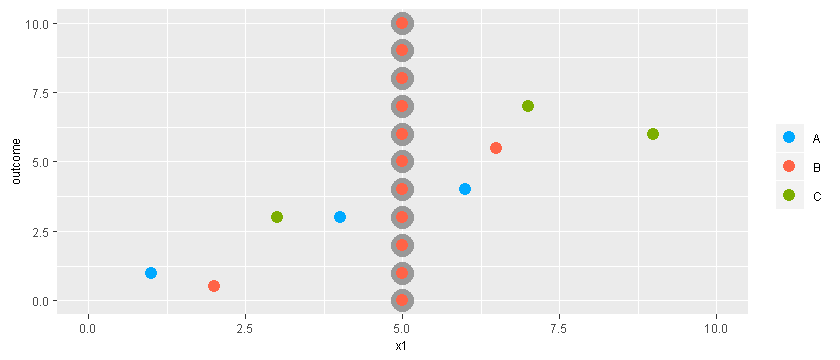

In [32]:
data = data.frame(x1=c(1.0, 2.0, 3.0, 4.0, 6.0, 6.5, 7.0, 9.0),
                  x2=c("A","B","C","A","A","B","C","C"),
                  outcome=c( 1.0, 0.5, 3.0, 3.0, 4.0, 5.5, 7.0, 6.0))
new = data.frame(x1=5.0, x2=factor("B", c("A","B","C")))

layout(fmt(data), fmt(new))

ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_point(aes(x=x1, y=outcome, color=x2)) +
geom_point(aes(x=x1, y=0:10), data=rbind.dup(new,11), color=NEW_COLOR, size=6) +
geom_point(aes(x=x1, y=0:10), data=rbind.dup(new,11), color=PALETTE[2])

### Transformation

Convert categorical variable(s) to dummy variables. 

In [33]:
data.d = dummify(data)
data.d$x2A = NULL

new.d = dummify(new)
new.d$x2A = NULL

layout(fmt(data.d), fmt(new.d))

data.d 
 
 
 x1 
 x2B 
 x2C 
 outcome 
 
 
 
 
 1.0 
 0 
 0 
 1.0 
 
 
 2.0 
 1 
 0 
 0.5 
 
 
 3.0 
 0 
 1 
 3.0 
 
 
 4.0 
 0 
 0 
 3.0 
 
 
 6.0 
 0 
 0 
 4.0 
 
 
 6.5 
 1 
 0 
 5.5 
 
 
 7.0 
 0 
 1 
 7.0 
 
 
 9.0 
 0 
 1 
 6.0 
 
 
 
 new.d 
 
 
 x1 
 x2B 
 x2C 
 
 
 
 
 5 
 1 
 0

### Model & Prediction with Transformation

Build a linear regression model based on the data expressed in terms of dummy variables.

Model: $outcome = 0.05 + 0.71x_1 + -0.08x_{2B} + 0.76x_{2C}$

model 
 
 
 
 coefficient 
 
 
 
 
 (Intercept) 
 0.0502513 
 
 
 x1 
 0.7135678 
 
 
 x2B 
 -0.0829146 
 
 
 x2C 
 0.7638191 
 
 
 
 new 
 
 
 x1 
 x2 
 outcome.predicted 
 
 
 
 
 5 
 B 
 3.535176

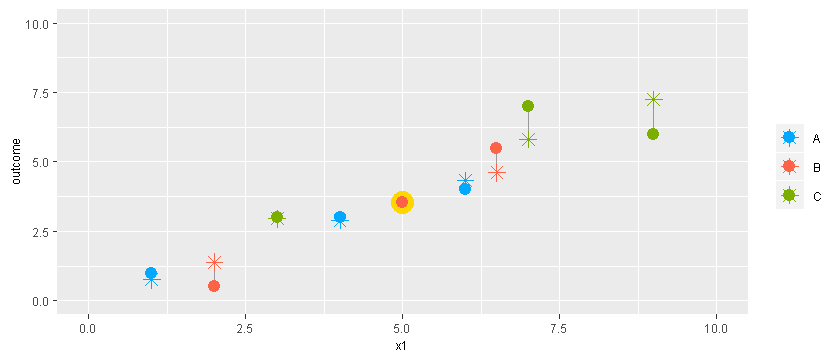

In [34]:
model.d = lm(outcome~., data.d)
new$outcome.predicted = predict(model.d, new.d)

layout(fmt(data.frame(coefficient=model.d$coefficients), "model", TRUE), fmt(new))

ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_segment(aes(x=x1, y=outcome, xend=x1, yend=predict(model.d, data.d))) +
geom_point(aes(x=x1, y=outcome, color=x2)) +
geom_point(aes(x=x1, y=predict(model.d, data.d), color=x2), shape=8) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
geom_point(aes(x=x1, y=outcome.predicted, color=new$x2), data=new) +
ylab("outcome")

### Easy Syntax for Linear Regression with Dummy-Coded Categorical Predictor Variables  (R)

Alternatively, build a linear regression model based on categorical variables (to be converted to dummy variables), and use the model to predict a new observation's outcome.

The `lm` function accepts categorical variables and automatically converts them to dummy variables, but assumes all possible categorical variable values are represented in the data -  so, be careful about new observations that have categorical variable values not represented in the data. 

Model: $outcome = 0.05 + 0.71x_1 + -0.08x_{2B} + 0.76x_{2C}$

In [35]:
model = lm(outcome ~ x1 + x2, data)
fmt(data.frame(coefficent=model$coefficients), "model", TRUE)

,coefficent
(Intercept),0.0502513
x1,0.7135678
x2B,-0.0829146
x2C,0.7638191


## Linear Regression with Index-Coded Categorical Predictor Variables

### Data

Consider this dataset and new observation.

data 
 
 
 x1 
 x2 
 outcome 
 
 
 
 
 1.0 
 A 
 1.0 
 
 
 2.0 
 B 
 0.5 
 
 
 3.0 
 C 
 3.0 
 
 
 4.0 
 A 
 3.0 
 
 
 6.0 
 A 
 4.0 
 
 
 6.5 
 B 
 5.5 
 
 
 7.0 
 C 
 7.0 
 
 
 9.0 
 C 
 6.0 
 
 
 
 new 
 
 
 x1 
 x2 
 
 
 
 
 5 
 B

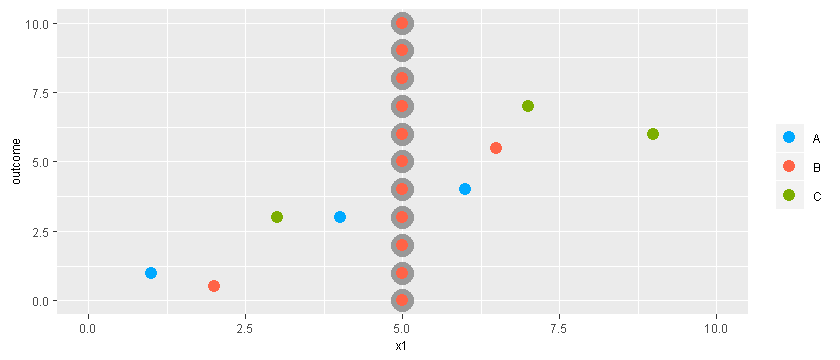

In [36]:
data = data.frame(x1=c(1.0, 2.0, 3.0, 4.0, 6.0, 6.5, 7.0, 9.0),
                  x2=c("A","B","C","A","A","B","C","C"),
                  outcome=c( 1.0, 0.5, 3.0, 3.0, 4.0, 5.5, 7.0, 6.0))
new = data.frame(x1=5.0, x2=factor("B", c("A","B","C")))

layout(fmt(data), fmt(new))

ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_point(aes(x=x1, y=outcome, color=x2)) +
geom_point(aes(x=x1, y=0:10), data=rbind.dup(new,11), color=NEW_COLOR, size=6) +
geom_point(aes(x=x1, y=0:10), data=rbind.dup(new,11), color=PALETTE[2])

### Transformation

Convert data's categorical variables to index variables. 

In [37]:
data.i = data.frame(x1=data$x1, x2.i=as.numeric(data$x2), outcome=data$outcome)
new.i = data.frame(x1=new$x1, x2.i=as.numeric(new$x2))

layout(fmt(data.i), fmt(new.i))

data.i 
 
 
 x1 
 x2.i 
 outcome 
 
 
 
 
 1.0 
 1 
 1.0 
 
 
 2.0 
 2 
 0.5 
 
 
 3.0 
 3 
 3.0 
 
 
 4.0 
 1 
 3.0 
 
 
 6.0 
 1 
 4.0 
 
 
 6.5 
 2 
 5.5 
 
 
 7.0 
 3 
 7.0 
 
 
 9.0 
 3 
 6.0 
 
 
 
 new.i 
 
 
 x1 
 x2.i 
 
 
 
 
 5 
 2

### Model & Prediction with Transformation

model 
 
 
 
 coefficient 
 
 
 
 
 (Intercept) 
 -0.4743905 
 
 
 x1 
 0.7259296 
 
 
 x2.i 
 0.3654272 
 
 
 
 new 
 
 
 x1 
 x2 
 outcome.predicted 
 
 
 
 
 5 
 B 
 3.886112

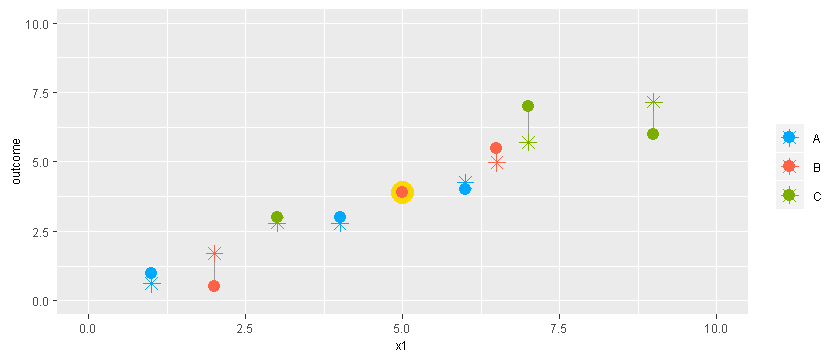

In [38]:
model = lm(outcome~x1+x2.i, data.i)
new$outcome.predicted = predict(model, new.i)

layout(fmt(data.frame(coefficient=model$coefficients), "model", TRUE), fmt(new))

ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_segment(aes(x=x1, y=outcome, xend=x1, yend=predict(model, data.i))) +
geom_point(aes(x=x1, y=predict(model, data.i), color=x2), shape=8) +
geom_point(aes(x=x1, y=outcome, color=x2)) +
geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
geom_point(aes(x=x1, y=outcome.predicted, color=x2), data=new)

## Dummy-Coded vs. Index-Coded 

The two models make different predictions.  The dummies version predicts the existing data slightly better. 

### Data

Consider this dataset and new observation.

In [39]:
data = data.frame(x1=c(1.0, 2.0, 3.0, 4.0, 6.0, 6.5, 7.0, 9.0),
                  x2=c("A","B","C","A","A","B","C","C"),
                  outcome=c( 1.0, 0.5, 3.0, 3.0, 4.0, 5.5, 7.0, 6.0))
new = data.frame(x1=5.0, x2=factor("B", c("A","B","C")))

layout(fmt(data), fmt(new))

data 
 
 
 x1 
 x2 
 outcome 
 
 
 
 
 1.0 
 A 
 1.0 
 
 
 2.0 
 B 
 0.5 
 
 
 3.0 
 C 
 3.0 
 
 
 4.0 
 A 
 3.0 
 
 
 6.0 
 A 
 4.0 
 
 
 6.5 
 B 
 5.5 
 
 
 7.0 
 C 
 7.0 
 
 
 9.0 
 C 
 6.0 
 
 
 
 new 
 
 
 x1 
 x2 
 
 
 
 
 5 
 B

### Models

In [40]:
model.dummy = lm(outcome~x1+x2, data) # dummy-coded
model.index = lm(outcome~x1+as.numeric(x2), data) # index-coded

layout(fmt(data.frame(coefficient=model.dummy$coefficients), "dummy model", TRUE),
       fmt(data.frame(coefficient=model.index$coefficients), "index model", TRUE))

,coefficient
(Intercept),0.0502513
x1,0.7135678
x2B,-0.0829146
x2C,0.7638191
,coefficient
(Intercept),-0.4743905
x1,0.7259296
as.numeric(x2),0.3654272


### Predictions

outcome.predicted_dummy,outcome.predicted_index
3.535176,3.886112
RMSE_dummy,RMSE_index
0.7684089,0.7938235


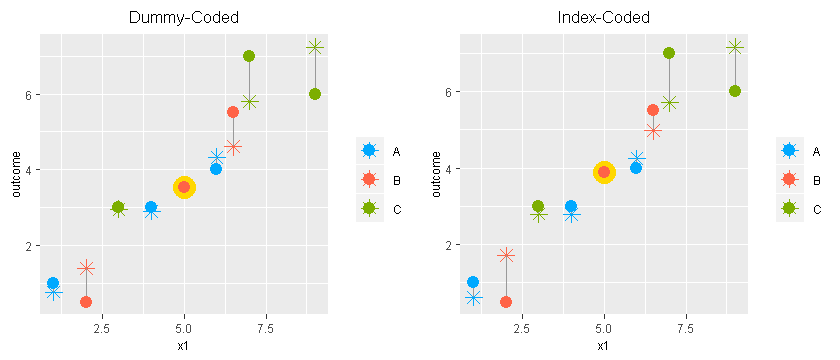

In [41]:
layout(data.frame(outcome.predicted_dummy=predict(model.dummy, new), outcome.predicted_index=predict(model.index, new)),
       data.frame(RMSE_dummy=sqrt(mean((data$outcome - predict(model.dummy, data))^2)),
                  RMSE_index=sqrt(mean((data$outcome - predict(model.index, data))^2))))

grid.arrange(ggplot(data) +
             geom_point(aes(x=x1, y=predict(model.dummy, data), color=x2), shape=8) +
             geom_segment(aes(x=x1, y=outcome, xend=x1, yend=predict(model.dummy, data))) +
             geom_point(aes(x=x1, y=outcome, color=x2)) +
             geom_point(aes(x=x1, y=predict(model.dummy, new)), data=new, color="gold", size=6) +
             geom_point(aes(x=x1, y=predict(model.dummy, new), color=x2), data=new) +
             ggtitle("Dummy-Coded") + ylab("outcome"),

             ggplot(data) +
             geom_point(aes(x=x1, y=predict(model.index, data), color=x2), shape=8) +
             geom_segment(aes(x=x1, y=outcome, xend=x1, yend=predict(model.index, data))) +
             geom_point(aes(x=x1, y=outcome, color=x2)) +
             geom_point(aes(x=x1, y=predict(model.index, new)), data=new, color="gold", size=6) +
             geom_point(aes(x=x1, y=predict(model.index, new), color=x2), data=new) +
             ggtitle("Index-Coded") + ylab("outcome"),

             nrow=1)

## Complex Linear Regression

You can combine and expand log and polynomial linear regression to form more complex models.

### Data

Consider this dataset and new observation.

data 
 
 
 x1 
 x2 
 outcome 
 
 
 
 
 1.0 
 A 
 1.0 
 
 
 2.0 
 B 
 3.5 
 
 
 3.0 
 C 
 6.0 
 
 
 4.0 
 A 
 2.0 
 
 
 6.0 
 B 
 1.0 
 
 
 6.5 
 C 
 3.0 
 
 
 7.0 
 A 
 5.0 
 
 
 9.0 
 A 
 9.0 
 
 
 
 new 
 
 
 x1 
 x2 
 
 
 
 
 5 
 A

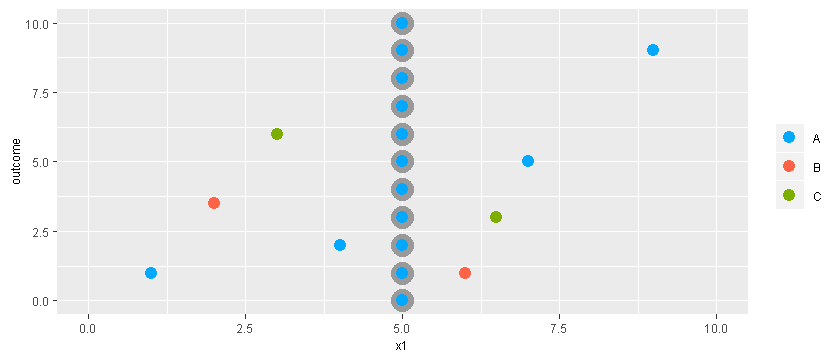

In [42]:
data = data.frame(x1=c(1.0, 2.0, 3.0, 4.0, 6.0, 6.5, 7.0, 9.0), 
                  x2=c("A","B","C","A","B","C","A","A"),
                  outcome=c( 1.0, 3.5, 6.0, 2.0, 1.0, 3.0, 5.0, 9.0))
new = data.frame(x1=5.0, x2=factor("A", c("A","B","C")))

layout(fmt(data), fmt(new))

ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_point(aes(x=x1, y=outcome, color=x2)) +
geom_point(aes(x=x1, y=0:10), data=rbind.dup(new,11), color=NEW_COLOR, size=6) +
geom_point(aes(x=new$x1, y=0:10), data=rbind.dup(new,11), color=PALETTE[1])

### Model & Prediction with Transformation

Model: $outcome = 15.31 + -0.083{x_1}^3 + 1.94{x_1}^2 + -17.18x_1 + 20.57log(x_1) + -0.97x_{2B} + 0.07x_{2C}$

model 
 
 
 
 coefficient 
 
 
 
 
 (Intercept) 
 15.3097469 
 
 
 poly(x1, 3, raw = TRUE)1 
 -17.1768327 
 
 
 poly(x1, 3, raw = TRUE)2 
 1.9382135 
 
 
 poly(x1, 3, raw = TRUE)3 
 -0.0832637 
 
 
 log(x1) 
 20.5677305 
 
 
 x2B 
 -0.9692099 
 
 
 x2C 
 0.0685454 
 
 
 
 new 
 
 
 x1 
 x2 
 outcome.predicted 
 
 
 
 
 5 
 A 
 0.5754375

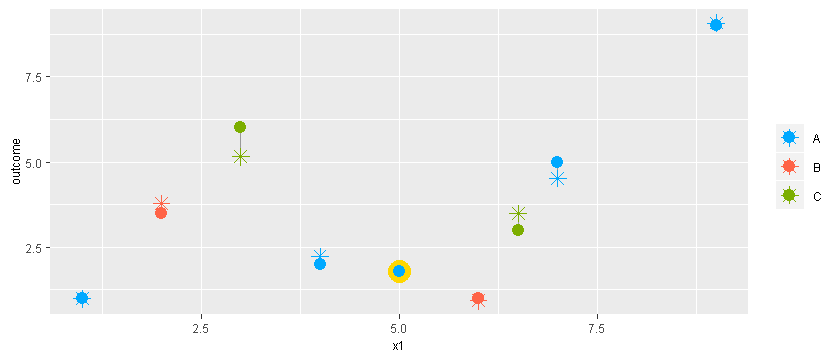

In [43]:
model = lm(log(outcome) ~ poly(x1,3,raw=TRUE) + log(x1) + x2, data)
new$outcome.predicted = predict(model, new)

layout(fmt(data.frame(coefficient=model$coefficients), "model", TRUE), fmt(new))

ggplot(data) +
geom_segment(aes(x=x1, y=outcome, xend=x1, yend=exp(predict(model, data)))) +
geom_point(aes(x=x1, y=outcome, color=x2)) +
geom_point(aes(x=x1, y=exp(outcome.predicted)), data=new, color="gold", size=6) +
geom_point(aes(x=x1, y=exp(outcome.predicted), color=x2), data=new) +
geom_point(aes(x=x1, y=exp(predict(model, data)), color=x2), shape=8)

## Code

### Useful Functions

In [44]:
# dummify                  # from setup.R

# help(lm)                 # from stats library
# help(predict.lm)         # from stats library, access using predict
# help(log)                # from base library
# help(exp)                # from base library
# help(poly)               # from stats library

### Templates

In [45]:
# Build a linear regression model
data = data.frame(x1=c(1,2,3,4), x2=c(5,3,7,9), outcome=c(6,5,3,1))
model = lm(outcome ~ ., data)
data.frame(model$coefficients)

,model.coefficients
(Intercept),8.3888889
x1,-1.3888889
x2,-0.1944444


In [46]:
# Build a linear regression model and make predictions

data = data.frame(x1=c(1,2,3,4), x2=c(5,3,7,9), outcome=c(6,5,3,1))
new = data.frame(x1=c(7,7), x2=c(3,4))

model = lm(outcome ~ ., data)
predict(model, new)

1         2 
-1.916667 -2.111111

## Expectations

Know about this:
* How to construct linear regression models, using R
* How to use linear regression models to make predictions, using R
* How to make a prediction using a linear regression model's intercept and coefficients, conceptually

## Further Reading

* https://www.youtube.com/watch?v=RLPVCJjTNgk&t=2s
* https://www.youtube.com/watch?v=DMITkTYiZ7k
* https://www.youtube.com/watch?v=bfA9n4_IxpY
* https://www.youtube.com/watch?v=T3OYn0Wjfzc&index=1&list=PLx9i0eyw8XB4DR9sZ93jQ8CPsBNesQRGf
* https://www.youtube.com/watch?v=6nXFZ12-1vg
* http://www-stat.wharton.upenn.edu/~stine/mich/DM_02.pdf
* https://en.wikipedia.org/wiki/Linear_regression
* https://en.wikipedia.org/wiki/Ordinary_least_squares

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised April 11, 2021
</span>
</p>